In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Datasets/covid_toy.csv')

In [3]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
df.shape

(100, 6)

In [6]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [7]:
df['cough'].value_counts()

Mild      62
Strong    38
Name: cough, dtype: int64

Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: city, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

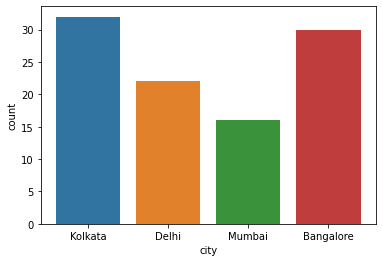

In [8]:
print(df['city'].value_counts())
sns.countplot(df['city']).plot(kind='bar')

In [9]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [10]:
df.sample(2)

,age,gender,fever,cough,city,has_covid
73,34,Male,98.0,Strong,Kolkata,Yes
63,10,Male,100.0,Mild,Bangalore,No


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df.drop(columns=['has_covid']),df['has_covid'],test_size=0.2)

In [12]:
X_train

,age,gender,fever,cough,city
33,26,Female,98.0,Mild,Kolkata
67,65,Male,99.0,Mild,Bangalore
77,8,Female,101.0,Mild,Kolkata
9,64,Female,101.0,Mild,Delhi
60,24,Female,102.0,Strong,Bangalore
...,...,...,...,...,...
24,13,Female,100.0,Strong,Kolkata
75,5,Male,102.0,Mild,Kolkata
29,34,Female,NaN,Strong,Mumbai
71,75,Female,104.0,Strong,Delhi


In [13]:
X_train.shape

(80, 5)

In [14]:
#adding  simple imputer 
si=SimpleImputer()
X_train_fever= si.fit_transform(X_train[['fever']])
X_test_fever= si.fit_transform(X_test[['fever']])

In [15]:
X_train_fever.shape

(80, 1)

In [16]:
#oridinalEncoder
oe=OrdinalEncoder(categories=[['Mild','Strong']])

In [17]:
X_train_cough= oe.fit_transform(X_train[['cough']])
X_test_cough= oe.fit_transform(X_test[['cough']])


In [21]:
#OneHotEncoding
ohe=OneHotEncoder(drop='first',sparse=False)
X_train_gender_city =ohe.fit_transform(X_train[['gender','city']])
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

In [23]:
X_train_gender_city.shape

(80, 4)

In [29]:
#Extracting Age
X_train_age = X_train.drop(columns=['gender','city','cough','fever']).values
X_test_age = X_test.drop(columns=['gender','city','cough','fever']).values

In [31]:
X_train_age.shape

(80, 1)

In [35]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)

In [36]:
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

In [37]:
X_train_transformed.shape

(80, 7)

# ColumnTransfer

In [38]:
from sklearn.compose import ColumnTransformer

In [44]:
transformer =ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [45]:
transformer.fit_transform(X_train)

array([[ 98.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  26.        ],
       [ 99.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  65.        ],
       [101.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   8.        ],
       [101.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,  64.        ],
       [102.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  24.        ],
       [103.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  83.        ],
       [101.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   0.        ,  34.        ],
       [ 99.        ,   1.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  66.        ],
       [ 98.        ,   1.        ,   0.        ,   1.        ,
          0.    

In [46]:
transformer.transform(X_test).shape

(20, 7)